Implementation of Softmax Function

In [ ]:
import numpy as np

def softmax(z):
    """
    Compute the softmax of a 2D numpy array along axis=1.

    Parameters:
    z (numpy.ndarray): Input array of shape (m, n)
                       m = number of samples
                       n = number of classes

    Returns:
    numpy.ndarray: Softmax probabilities of shape (m, n)
                   Each row sums to 1 and represents
                   a probability distribution.
    """
    # Normalize input to prevent numerical instability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))

    # Compute softmax probabilities
    softmax_output = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    return softmax_output


Test Cases for Softmax Function:

In [ ]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def test_softmax():
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[1000, 1000, 1000]]), "Large identical values"),
        (np.array([[-1000, -1000, -1000]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]

    for i, (z, description) in enumerate(test_cases):
        print(f"Test {i + 1}: {description}")
        result = softmax(z)

        assert np.allclose(result.sum(axis=1), 1)
        assert np.all(result >= 0)

        print("Passed\n")

    print("All tests passed for softmax function.")


test_softmax()


Test 1: All zeros
Passed

Test 2: Simple case
Passed

Test 3: Large identical values
Passed

Test 4: Small identical values
Passed

Test 5: Mixed positive and negative
Passed

All tests passed for softmax function.


Implementation of Categorical Log-Loss Function:

In [ ]:
import numpy as np

def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.

    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,)
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,)

    Returns:
    float: Cross-entropy loss
    """
    return -np.sum(y_true * np.log(y_pred + 1e-10))  # epsilon prevents log(0)


In [ ]:
def test_loss_softmax():
    """
    Test the loss_softmax function using known inputs and outputs.
    """

    # Test Case 1: Correct prediction
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    expected_loss = -np.log(0.8)

    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), \
        "Test Case 1 Failed"

    # Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    expected_loss = -np.log(0.3)

    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), \
        "Test Case 2 Failed"

    # Test Case 3: Edge case with near-zero probability
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.01, 0.98, 0.01])
    expected_loss = -np.log(0.98)

    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), \
        "Test Case 3 Failed"

    print("All test cases passed!")
test_loss_softmax()


All test cases passed!


Implemenetation of Cost Function:

In [ ]:
import numpy as np

def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)

    Returns:
    float: Average cross-entropy cost
    """
    n, d = X.shape

    z = np.dot(X, W) + b
    y_pred = softmax(z)

    cost = -np.sum(y * np.log(y_pred + 1e-10)) / n
    return cost


In [ ]:
def test_cost_softmax():
    """
    Test the cost_softmax function using known inputs and outputs.
    """

    # Test Case 1: Small dataset
    X = np.array([[1, 2],
                  [2, 3],
                  [3, 4]])

    y = np.array([[1, 0],
                  [0, 1],
                  [1, 0]])

    W = np.array([[1, -1],
                  [-1, 1]])

    b = np.array([0, 0])

    z = np.dot(X, W) + b
    y_pred = softmax(z)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]

    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), \
        "Test Case 1 Failed"

    # Test Case 2: Zero weights and bias
    X = np.array([[1, 0],
                  [0, 1],
                  [1, 1]])

    y = np.array([[1, 0],
                  [0, 1],
                  [1, 0]])

    W = np.zeros((2, 2))
    b = np.zeros(2)

    z = np.dot(X, W) + b
    y_pred = softmax(z)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]

    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), \
        "Test Case 2 Failed"

    print("All test cases passed!")
test_cost_softmax()

All test cases passed!


Computing Gradients for Sotmax Regression:

In [ ]:
import numpy as np

def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the softmax cost function
    with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)

    Returns:
    tuple: (grad_W, grad_b)
           grad_W shape: (d, c)
           grad_b shape: (c,)
    """
    n, d = X.shape

    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b


In [ ]:
def test_compute_gradient_softmax():
    """
    Test the compute_gradient_softmax function using a simple example.
    """

    # Define simple inputs
    X = np.array([[1, 2],
                  [3, 4]])  # Shape (2, 2)

    y = np.array([[1, 0],
                  [0, 1]])  # One-hot encoded

    W = np.array([[0.1, 0.2],
                  [0.3, 0.4]])

    b = np.array([0.01, 0.02])

    # Expected gradients (reference calculation)
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

    # Compute gradients using function
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

    # Assertions
    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), \
        "Gradient W does not match expected values"

    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), \
        "Gradient b does not match expected values"

    print("All tests passed for compute_gradient_softmax!")
test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


Gradient Descent for Softmax Regression:

In [ ]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)
    alpha (float): Learning rate
    n_iter (int): Number of iterations
    show_cost (bool): Whether to display the cost at intervals

    Returns:
    tuple: Optimized weights, biases, and cost history
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update parameters
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Compute cost
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Optionally display cost
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


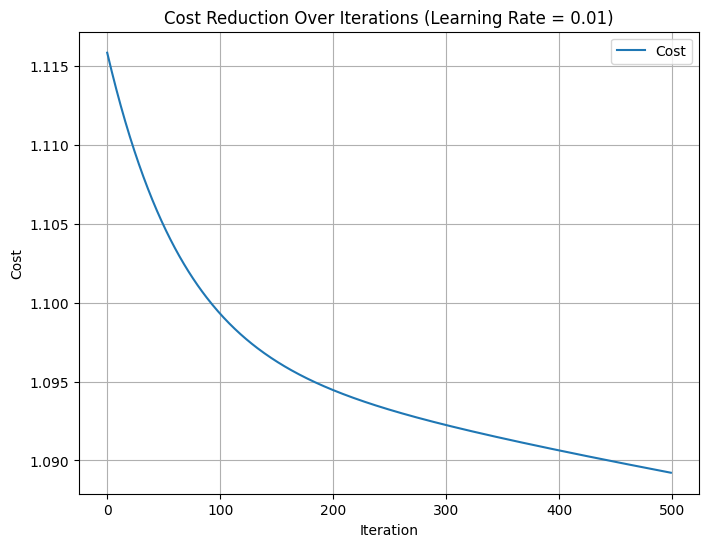

Initial Cost: 1.115861
Final Cost: 1.089223


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def test_gradient_descent_softmax_with_plot():
    """
    Test gradient descent by plotting Cost vs Iterations.
    """

    # Generate synthetic data
    np.random.seed(0)
    n, d, c = 100, 5, 3  # samples, features, classes

    X = np.random.rand(n, d)

    y_indices = np.random.randint(0, c, size=n)
    y = np.zeros((n, c))
    y[np.arange(n), y_indices] = 1  # One-hot encoding

    # Initialize weights and biases
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Gradient descent parameters
    alpha = 0.01
    n_iter = 500

    # Run gradient descent
    W_opt, b_opt, cost_history = gradient_descent_softmax(
        X, y, W, b, alpha, n_iter, show_cost=False
    )

    # Plot cost history
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_iter), cost_history, label="Cost")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost Reduction Over Iterations (Learning Rate = {alpha})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print initial and final cost
    print(f"Initial Cost: {cost_history[0]:.6f}")
    print(f"Final Cost: {cost_history[-1]:.6f}")
test_gradient_descent_softmax_with_plot()

Decision/Prediction Function:

In [ ]:
import numpy as np

def predict_softmax(X, W, b):
    """
    Predict the class labels for input data.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d)
    W (numpy.ndarray): Weight matrix of shape (d, c)
    b (numpy.ndarray): Bias vector of shape (c,)

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,)
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    return np.argmax(y_pred, axis=1)


In [ ]:
def test_predict_softmax():
    """
    Test the predict_softmax function using synthetic data.
    """

    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 10, 5, 3  # samples, features, classes

    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Compute predictions
    predictions = predict_softmax(X, W, b)

    # Check output shape
    assert predictions.shape == (n,), \
        f"Shape mismatch: expected {(n,)}, got {predictions.shape}"

    # Check prediction range
    assert np.all(predictions >= 0) and np.all(predictions < c), \
        f"Predictions out of range: expected 0 to {c-1}, got {predictions}"

    # Check integer type
    assert np.issubdtype(predictions.dtype, np.integer), \
        f"Predictions are not integers: {predictions.dtype}"

    print("All tests passed for predict_softmax!")
test_predict_softmax()

All tests passed for predict_softmax!


7. Evaluating Classifier:

In [ ]:
def evaluate_classification(y_true, y_pred):
    """
    Evaluate the classification performance using confusion matrix,
    precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n,)
    y_pred (numpy.ndarray): Predicted class labels of shape (n,)

    Returns:
    tuple: Confusion matrix, precision, recall, and F1-score
    """
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    return cm, precision, recall, f1


1. Some Basic Data Operation, Loading, Analysis and Cleaning:


Necessary Import and Checking the Data:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

# Display information about the dataset before cleaning
print("Dataset Info:")
X.info()

print("\nDataset Description Before Cleaning:")
print(X.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Dataset Description Before Cleaning:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000

2. Constructing One Hot Encoding for Label Vector:

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data         # Feature matrix
y = iris.target       # Target vector

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)  # Use sparse=False if scikit-learn <1.2
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

print(y_onehot)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

3. Train Test Split and Standard Scaling of the Data:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target
encoder = OneHotEncoder(sparse_output=False)  # Use sparse=False if sklearn <1.2
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Initialize scaler and scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assertions to check the shapes
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), \
    f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), \
    f"X_test_scaled shape mismatch: {X_test_scaled.shape}"

print("Shape assertions passed!")


Shape assertions passed!


4. Training of the Softmax Regression:


Training Softmax Regression Model:
Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


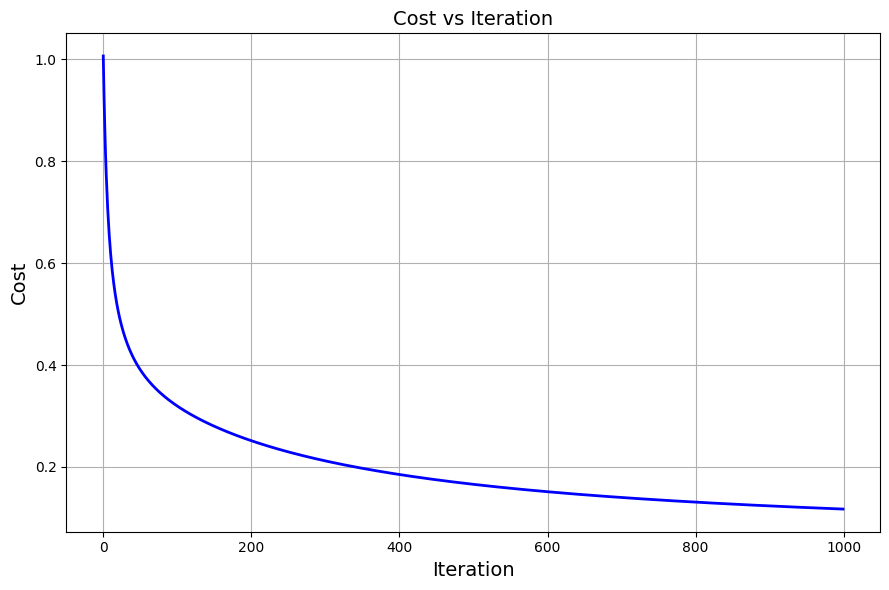

In [ ]:
import matplotlib.pyplot as plt

# Initializations
num_classes = y_train.shape[1]
num_features = X_train_scaled.shape[1]

W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

alpha = 0.1
n_iter = 1000

print("\nTraining Softmax Regression Model:")

# Train the model
W, b, cost_history = gradient_descent_softmax(
    X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True
)

# Plot Cost vs Iterations
plt.figure(figsize=(9, 6))
plt.plot(cost_history, color='blue', linewidth=2)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


4. Did the Model Overfitt or Underfitt?
Evaluating Train and Test Performance on Cost Value:

In [30]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.1172
Test Loss (Cost): 0.1575


5. How well my model did?
Evalation on various Metrics for Classification:


Test Accuracy: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


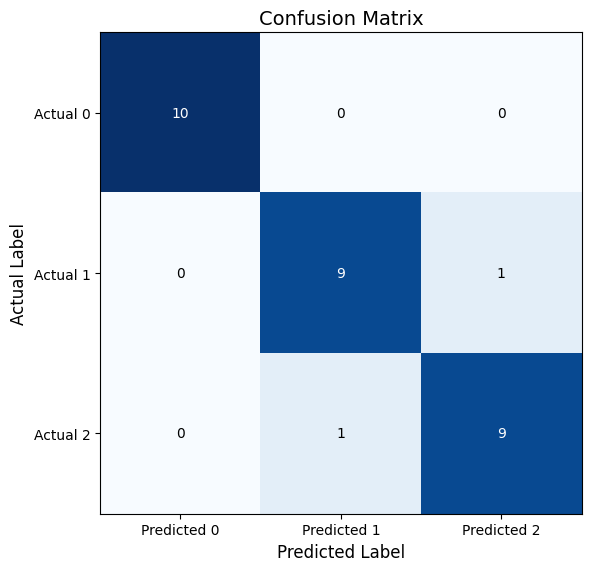

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy on test data
test_accuracy = np.mean(y_test_pred == np.argmax(y_test, axis=1)) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
y_test_true = np.argmax(y_test, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)

print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Optional - Visualizing the Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues')  # Use a color map for better visualization

# Set tick labels for the axes
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(['Predicted 0', 'Predicted 1', 'Predicted 2'])
ax.set_yticklabels(['Actual 0', 'Actual 1', 'Actual 2'])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha='center', va='center',
            color='white' if cm[i, j] > np.max(cm) / 2 else 'black'
        )

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()